In [1]:
import pandas as pd
import pytrends
from pytrends.request import TrendReq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pytrends = TrendReq(hl='en-US', tz=120)

In [3]:
kw_words = ['bitcoin', 'crypto']
pytrends.build_payload(kw_words)

In [4]:
data_requests = pytrends.interest_over_time()
data_requests.index = data_requests.index.date

In [5]:
data_requests.head(len(data_requests))

,bitcoin,crypto,isPartial
2017-05-21,19,1,False
2017-05-28,12,1,False
2017-06-04,12,1,False
2017-06-11,13,1,False
2017-06-18,10,1,False
...,...,...,...
2022-04-17,17,8,False
2022-04-24,18,8,False
2022-05-01,19,8,False
2022-05-08,41,18,False


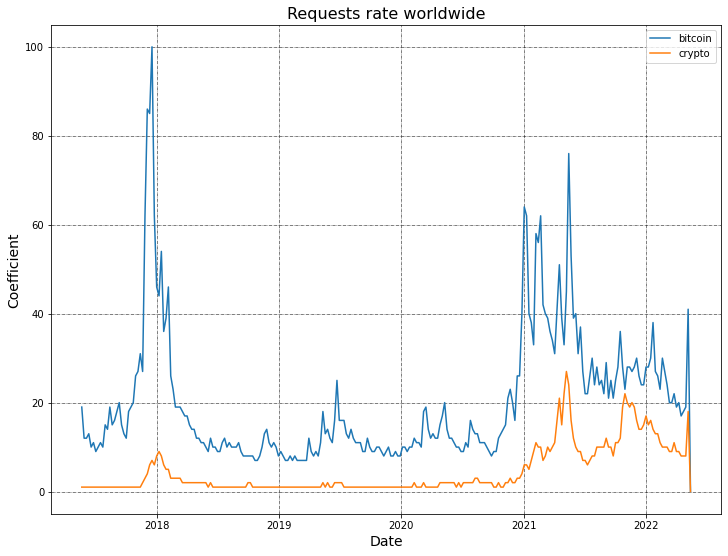

In [6]:
data_requests.iloc[:, :-1].plot(x=None, y=None, figsize=(12, 9))
plt.title('Requests rate worldwide', fontsize=16)
plt.ylabel('Сoefficient', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.grid(which = 'major', color = 'k', linestyle = '-.', linewidth=0.5)
plt.show()

In [7]:
import yfinance as yf
from yahoofinancials import YahooFinancials

oldest_date = data_requests.index.min()
newest_date = data_requests.index.max()

yahoo_financials = YahooFinancials('BTC-USD')
data = yahoo_financials.get_historical_price_data(str(oldest_date), 
                                                  str(newest_date), 
                                                  'daily')
btc_df = pd.DataFrame(data['BTC-USD']['prices'])
btc_df = btc_df.iloc[::7, :]
btc_df = btc_df.drop('date', axis=1).set_index('formatted_date')
btc_df.head(len(btc_df))

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2017-05-21,2119.080078,2037.500000,2067.030029,2041.199951,1147859968,2041.199951
2017-05-28,2267.340088,2054.080078,2054.080078,2155.800049,1147139968,2155.800049
2017-06-04,2585.889893,2452.540039,2547.790039,2511.810059,1355120000,2511.810059
2017-06-11,2996.600098,2840.530029,2942.409912,2958.110107,1752400000,2958.110107
2017-06-18,2662.100098,2516.330078,2655.350098,2548.290039,1178659968,2548.290039
...,...,...,...,...,...,...
2022-04-17,40570.726562,39620.894531,40417.777344,39716.953125,19087633042,39716.953125
2022-04-24,39845.925781,39233.539062,39478.375000,39469.292969,17964398167,39469.292969
2022-05-01,38627.859375,37585.789062,37713.265625,38469.093750,27002760110,38469.093750


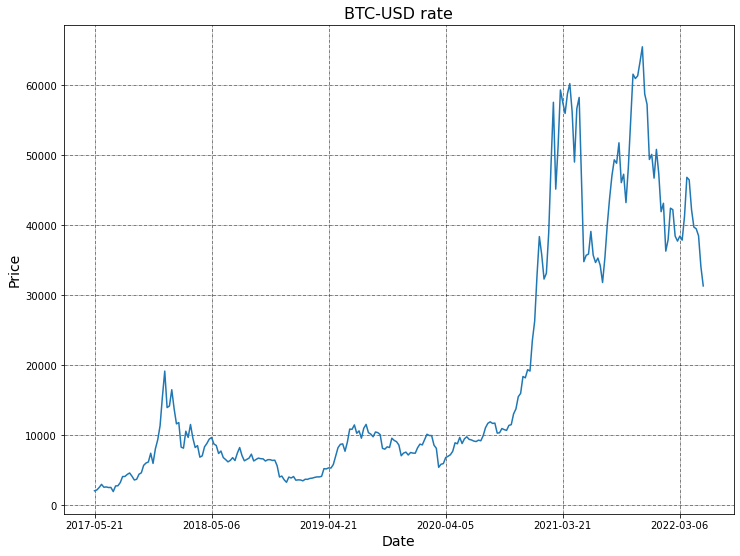

In [8]:
btc_df['adjclose'].plot(x=None, y=None, figsize=(12, 9))
plt.title('BTC-USD rate', fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.grid(which = 'major', color = 'k', linestyle = '-.', linewidth=0.5)
plt.show()

In [9]:
btc_list = btc_df['adjclose'].tolist()
data_requests_clear = data_requests.drop(['isPartial'], axis=1)
data_requests_clear['adjclose'] = btc_list
data_requests_clear.head((len(data_requests_clear)))

,bitcoin,crypto,adjclose
2017-05-21,19,1,2041.199951
2017-05-28,12,1,2155.800049
2017-06-04,12,1,2511.810059
2017-06-11,13,1,2958.110107
2017-06-18,10,1,2548.290039
...,...,...,...
2022-04-17,17,8,39716.953125
2022-04-24,18,8,39469.292969
2022-05-01,19,8,38469.093750
2022-05-08,41,18,34059.265625


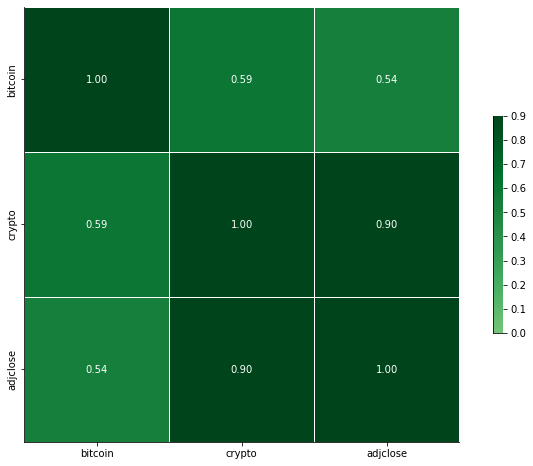

In [10]:
corr = data_requests_clear.corr()
corr_heatmap = sns.heatmap(corr, vmin=0, vmax=0.9, center=0,square=True, linewidths=.5, 
                            cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='Greens')
sns.despine()
corr_heatmap.figure.set_size_inches(12,8)
plt.show()

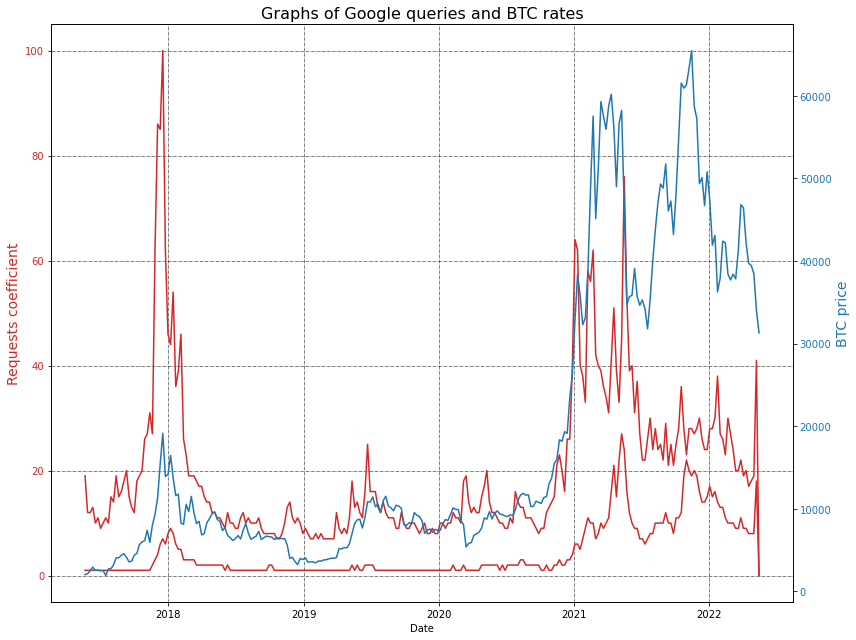

In [11]:
time = data_requests.index

fig, ax1 = plt.subplots(figsize=(12, 9))
plt.title('Graphs of Google queries and BTC rates', fontsize=16)
plt.grid(which = 'major', color = 'k', linestyle = '-.', linewidth=0.5)
color = 'tab:red'

ax1.set_xlabel('Date')
ax1.set_ylabel('Requests coefficient', color=color, fontsize=14)
ax1.plot(time, data_requests[['crypto', 'bitcoin']], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('BTC price', color=color, fontsize=14)  
ax2.plot(time, btc_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()